# WeatherPy
----

### Analysis
* 
* 
* 



In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
def api_call(x,y):
    return requests.get(f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={x}&q={y}').json()

In [24]:
columns = ("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed")
weatherdata = pd.DataFrame(columns=columns)

In [33]:
print(f"Beinning Data Retreival")
print("-"*27)

record = 1
group = 1
index = 1

for city in cities:
    response = api_call(api_key,city)
    try:
        print(f"Processing Record {record} of Set {group} | {city}")
        weatherdata.set_value(index, "City", city)
        weatherdata.set_value(index, "Cloudiness", response['clouds']['all'])
        weatherdata.set_value(index, "Country", response['sys']['country'])
        weatherdata.set_value(index, "Date", response['dt'])
        weatherdata.set_value(index, "Humidity", response['main']['humidity'])
        weatherdata.set_value(index, "Lat", response['coord']['lat'])
        weatherdata.set_value(index, "Lng", response['coord']['lon'])
        weatherdata.set_value(index, "Max Temp", response['main']['temp_max'])
        weatherdata.set_value(index, "Wind Speed", response['wind']['speed'])
        record +=1
        index +=1
        time.sleep(random.randint(1,3))
    except:
        print("City not found. Skipping...")
        record +=1
    finally:
        if record > 50:
            record = 1
            group += 1


Beinning Data Retreival
---------------------------
Processing Record 1 of Set 1 | dauphin


C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release

Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | xacmaz
Processing Record 4 of Set 1 | yumen
Processing Record 5 of Set 1 | imbituba
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | naron
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | honiara
Processing Record 16 of Set 1 | iranshahr
Processing Record 17 of Set 1 | calamar
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 1 | saint-francois
Processing Record 21 of Set 1 | nabire
Processing Record 22 of Set 1 | yanan
City not found. Skipping...
Processing Record 23 of Set

Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | bargal
City not found. Skipping...
Processing Record 43 of Set 4 | viligili
City not found. Skipping...
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | viljoenskroon
Processing Record 46 of Set 4 | vaini
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | vanavara
Processing Record 49 of Set 4 | colac
Processing Record 50 of Set 4 | luderitz
Processing Record 1 of Set 5 | rulenge
Processing Record 2 of Set 5 | buchanan
Processing Record 3 of Set 5 | bonfim
Processing Record 4 of Set 5 | burgeo
Processing Record 5 of Set 5 | polovinnoye
Processing Record 6 of Set 5 | sambava
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | katobu
Processing Record 9 of Set 5 | mpongwe
Processing Record 10 of Set 5 | cetraro
Processing Record 11 of Set 5 | sorvag
City not found. Skipping...
Processing Record 12 of Set 5 | mys shmidta
City not found. Skipping...
Processing Rec

Processing Record 28 of Set 8 | san quintin
Processing Record 29 of Set 8 | teya
Processing Record 30 of Set 8 | marcona
City not found. Skipping...
Processing Record 31 of Set 8 | amiens
Processing Record 32 of Set 8 | cabra
Processing Record 33 of Set 8 | cape coast
Processing Record 34 of Set 8 | borlange
City not found. Skipping...
Processing Record 35 of Set 8 | birjand
Processing Record 36 of Set 8 | chapais
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | biloela
Processing Record 39 of Set 8 | piranshahr
Processing Record 40 of Set 8 | pitea
Processing Record 41 of Set 8 | north platte
Processing Record 42 of Set 8 | west point
Processing Record 43 of Set 8 | motygino
Processing Record 44 of Set 8 | lompoc
Processing Record 45 of Set 8 | havre
Processing Record 46 of Set 8 | usinsk
Processing Record 47 of Set 8 | kloulklubed
Processing Record 48 of Set 8 | gold coast
Processing Record 49 of Set 8 | ankang
Processing Record 50 

Processing Record 13 of Set 12 | port macquarie
Processing Record 14 of Set 12 | labutta
City not found. Skipping...
Processing Record 15 of Set 12 | port blair
Processing Record 16 of Set 12 | puerto escondido
Processing Record 17 of Set 12 | itoman
Processing Record 18 of Set 12 | margate
Processing Record 19 of Set 12 | korem
Processing Record 20 of Set 12 | takoradi
Processing Record 21 of Set 12 | saint-leu
Processing Record 22 of Set 12 | galle
Processing Record 23 of Set 12 | tulum
Processing Record 24 of Set 12 | tombouctou
Processing Record 25 of Set 12 | solnechnyy
Processing Record 26 of Set 12 | merauke
Processing Record 27 of Set 12 | rungata
City not found. Skipping...
Processing Record 28 of Set 12 | qurayyat
City not found. Skipping...
Processing Record 29 of Set 12 | enkhuizen
Processing Record 30 of Set 12 | bertoua
Processing Record 31 of Set 12 | trincomalee
Processing Record 32 of Set 12 | ayan
Processing Record 33 of Set 12 | sinegorye
Processing Record 34 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
weatherdata.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [37]:
weatherdata.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,dauphin,75,CA,1556758800,27,51.15,-100.04,51.8,6.93
2,qaanaaq,100,GL,1556760186,90,77.48,-69.36,35.9,5.44
3,xacmaz,60,AZ,1556760188,49,41.46,48.81,56.78,5.32
4,yumen,99,CN,1556760191,13,40.29,97.04,60.2,13.62
5,imbituba,40,BR,1556755200,78,-28.24,-48.67,71.6,4.7


In [38]:
weatherdata.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

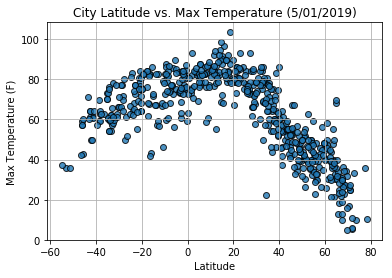

In [45]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Max Temp"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Max Temperature (5/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_data/LatitudeVsMaxTemp.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Humidity Plot

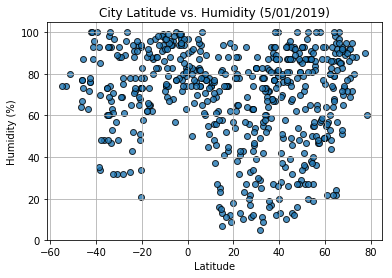

In [44]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Humidity"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Humidity (5/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/LatitudeVsHumidity.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Cloudiness Plot

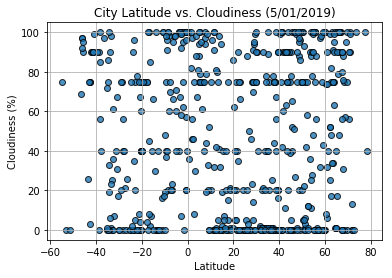

In [46]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Cloudiness"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Cloudiness (5/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/LatitudeVsCloudiness.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Wind Speed Plot

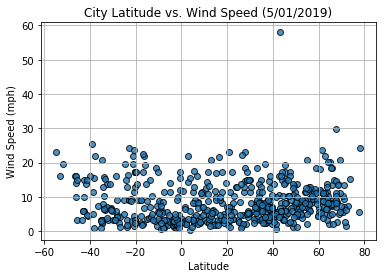

In [47]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Wind Speed"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Wind Speed (5/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_data/LatitudeVsWindSpeed.png', bbox_inches = 'tight')
plt.show()